# Exploratory Data Analysis of NIFTY-50 trends(2000-2021)

#### Team
* Amith Chauhan, 13516
* Maitray Bhardwaj, 13527
* Arvind Batham, 13554
* Harshit Kumar Moore, 13556

#### Objective
To predict trends of stocks in volatile markets of NIFTY-50. To give a great technical analysis so investors can clearly understand the sentiments of the market.

#### Technical Details
Python language with libraries numpy, pandas, matplotlib, seaborn, plotly to compare, visualize and predict the trends in NIFTY-50.

#### Innovativeness and Usefulness
To give a vivid picture of stocks to investors, so they can decide when to invest and how much capital to invest with minimum risk factor.

## Introduction
<br>

The NIFTY 50 index is National Stock Exchange of India's benchmark broad based stock market index for the Indian equity market. NIFTY 50 stands for National Index Fifty, and represents the weighted average of 50 Indian company stocks in 17 sectors. It is one of the two main stock indices used in India, the other being the BSE Sensex
<br>

This project uses the dataset imported from Kaggle. The dataset is available at https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data. This dataset includes roughly over 50 csv files, with each csv file representing the market performance of a company during its time in NIFTY-50. In order to draw useful insights, this project analyzes two of these companies, namely:
<br>

1. Tata Consultancy Services Ltd. (TCS.csv)
2. Reliance Industries Ltd. (RELIANCE.csv)

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set()

In [3]:
warnings.filterwarnings('ignore')

## 2. Load datasets

In [4]:
# loading the TCS dataset and converting index to datetime type
tcs = pd.read_csv('./datasets/TCS.csv', index_col = 'Date', parse_dates = True)

In [5]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [6]:
# loading the Reliance dataset and converting index to datetime type
rel = pd.read_csv('./datasets/RELIANCE.csv', index_col = 'Date', parse_dates = True)

In [7]:
rel.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [8]:
print('TCS => Shape :', tcs.shape, ', Size:', tcs.size)
print('Reliance => Shape :', rel.shape, ', Size:', rel.size)

TCS => Shape : (4139, 14) , Size: 57946
Reliance => Shape : (5306, 14) , Size: 74284


### 3. Dataset Description
<br>

Description of columns in the files:

* Date(index) - Date of trade
* symbol - Name of the company (RELIANCE or TCS)
* Series - We have only one series(EQ): It stands for Equity. In this series intraday trading is possible in addition to delivery
* Prev Close - Refers to the prior day's final price of a security when the market officially closes for the day.
* Open - The open is the starting period of trading on a securities exchange or organized over-the-counter market.
* High -  Highest price at which a stock traded during the course of the trading day.
* Low - Lowest price at which a stock traded during the course of the trading day.
* Last - The last price of a stock is just one price to consider when buying or selling shares. The last price is simply the most recent one
* Close - The close is a reference to the end of a trading session in the financial markets when the markets close for the day. 
* VWAP(Volume-weighted average price) - It is the ratio of the value traded to total volume traded over a particular time horizon. It is a measure of the average price at which a stock is traded over the trading horizon
* Volume - It is the amount of a security that was traded during a given period of time
* Turnover -It is a measure of sellers versus buyers of a particular stock. It is calculated by dividing the daily volume of a stock by the "float" of a stock, which is the number of shares available for sale by the general trading public.
* Trades- The number of shares being traded on a given day is called trading volumes
* Deliverabe Volume -  quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares 
* %Deliverable - shares which are actually transferred from one person's to another's demat account.

The differences in the indices of the two datasets suggest that these two don't have all the dates in common. Since we will be comparing them, we need to drop rows from one of them until all the dates are common in both datasets.

In [9]:
# using merge operation to only get the indices of shared dates
common_dates = pd.merge(tcs, rel, on='Date').index
common_dates

DatetimeIndex(['2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03',
               '2004-09-06', '2004-09-07',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=4139, freq=None)

In [10]:
# dropping unshared dates
tcs = tcs.loc[common_dates, :]
rel = rel.loc[common_dates, :]

In [11]:
# checking if all the indices are common
(tcs.index == rel.index).all()

True

### 4. EDA of TCS and Reliance datasets

In [12]:
# info about the TCS dataset
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4139 entries, 2004-08-25 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4139 non-null   object 
 1   Series              4139 non-null   object 
 2   Prev Close          4139 non-null   float64
 3   Open                4139 non-null   float64
 4   High                4139 non-null   float64
 5   Low                 4139 non-null   float64
 6   Last                4139 non-null   float64
 7   Close               4139 non-null   float64
 8   VWAP                4139 non-null   float64
 9   Volume              4139 non-null   int64  
 10  Turnover            4139 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4139 non-null   int64  
 13  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 485.0+ KB


In [13]:
# info about the Reliance dataset
rel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4139 entries, 2004-08-25 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4139 non-null   object 
 1   Series              4139 non-null   object 
 2   Prev Close          4139 non-null   float64
 3   Open                4139 non-null   float64
 4   High                4139 non-null   float64
 5   Low                 4139 non-null   float64
 6   Last                4139 non-null   float64
 7   Close               4139 non-null   float64
 8   VWAP                4139 non-null   float64
 9   Volume              4139 non-null   int64  
 10  Turnover            4139 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4134 non-null   float64
 13  %Deliverble         4134 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 485.0+ KB


The above cell suggests that there are some missing values in the these datasets. We will have them removed.
<br>

*An important thing to note is that if a row is removed from one dataset then the row with that index will have to be removed from the other dataset as well. Thus, we will handling the missing values of these two datasets together.*

#### 4.1. Handling missing values

In [14]:
# columnwise null value count
tcs.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [15]:
# columnwise null value count
rel.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       5
%Deliverble              5
dtype: int64

In this analysis, some columns are not necessary for many queries. These columns will be dropped to reduce computation cost, time and redundancy. The remaining columns will be used to gain some useful insights into the nature of stock market.

In [16]:
useless_cols = ['Prev Close', 'Trades', 'Deliverable Volume', '%Deliverble', 'Symbol', 'Series', 'Turnover']

for df in (tcs, rel):
    df.drop(useless_cols, axis=1, inplace=True)

In [17]:
tcs.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume'], dtype='object')

In [18]:
rel.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume'], dtype='object')

In [19]:
rel.isna().sum()

Open      0
High      0
Low       0
Last      0
Close     0
VWAP      0
Volume    0
dtype: int64

In [20]:
tcs.isna().sum()

Open      0
High      0
Low       0
Last      0
Close     0
VWAP      0
Volume    0
dtype: int64

There are no missing values in the data. The data has been cleaned.

## 5. Queries for analysis

### 5.1 Correlation between the opening price and the Volume

In [21]:
# calculating correlation between Open column and Volume column

tcs_open_volume_corr = tcs['Open'].corr(tcs['Volume'])
rel_open_volume_corr = rel['Open'].corr(rel['Volume'])

print("Correlation between TCS's Open and Volume:", '%.3f' % tcs_open_volume_corr)
print("Correlation between Reliance's Open and Volume:", '%.3f' % rel_open_volume_corr)

Correlation between TCS's Open and Volume: 0.095
Correlation between Reliance's Open and Volume: 0.153


The above values state that Reliance's opening price and volume are more strongly correlated to each other than that of TCS. So, for Reliance, opening prices and volume go hand in hand.

### 5.2 Covariance between opening price and the Volume

In [22]:
# calculating covariance between Open column and Volume column

tcs_open_volume_cov = tcs['Open'].cov(tcs['Volume'])
rel_open_volume_cov = rel['Open'].cov(rel['Volume'])

print("Covariance between TCS's Open and Volume:", '%.3f' % tcs_open_volume_cov)
print("Covariance between Reliance's Open and Volume:", '%.3f' % rel_open_volume_cov)

Covariance between TCS's Open and Volume: 109872398.503
Covariance between Reliance's Open and Volume: 411661613.509


### 5.3 Probablity of stock prices increasing on a day

In [23]:
# creating a boolean array where True means that price increased and False otherwise

tcs_did_increase = tcs['Close'] > tcs['Open']
rel_did_increase = rel['Close'] > rel['Open']

# converting to percentage

tcs_increase_percen = (tcs_did_increase.sum() / len(tcs_did_increase) * 100)
rel_increase_percen = (rel_did_increase.sum() / len(rel_did_increase) * 100)

print("Chances of price increasing on a day for TCS: ", '%.3f' % tcs_increase_percen, '%', sep="")
print("Chances of price increasing on a day for Reliance: ", '%.3f' % rel_increase_percen, '%', sep="")

Chances of price increasing on a day for TCS: 47.620%
Chances of price increasing on a day for Reliance: 47.209%


This simple method suggests that TCS and Reliance are equally likely to experience an increase in price on a day.

### 5.4 Daily Returns

In [24]:
# calculating daily returns by getting percentage change in closing prices

tcs['day_percen_change'] = tcs['Close'].pct_change() * 100
rel['day_percen_change'] = rel['Close'].pct_change() * 100

# handling the missing values generated in the first rows

for df in (tcs, rel):
    df['day_percen_change'].fillna(df['day_percen_change'].mean(), inplace=True)

In [25]:
tcs.head()

,Open,High,Low,Last,Close,VWAP,Volume,day_percen_change
Date,,,,,,,,
2004-08-25,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,0.060385
2004-08-26,992.0,997.0,975.30,976.85,979.00,985.65,5055400,-0.905916
2004-08-27,982.4,982.4,958.55,961.20,962.65,969.94,3830750,-1.670072
2004-08-30,969.9,990.0,965.00,986.40,986.75,982.65,3058151,2.503506
2004-08-31,986.5,990.0,976.00,987.80,988.10,982.18,2649332,0.136813


In [26]:
rel.head()

,Open,High,Low,Last,Close,VWAP,Volume,day_percen_change
Date,,,,,,,,
2004-08-25,454.00,458.90,450.45,458.00,458.00,455.09,6272902,0.068040
2004-08-26,461.00,466.35,459.30,461.05,460.70,462.83,6532004,0.589520
2004-08-27,461.25,463.40,453.65,459.10,458.20,458.38,4769921,-0.542652
2004-08-30,461.10,468.40,461.10,467.00,467.20,466.58,3505532,1.964208
2004-08-31,468.05,476.85,468.05,475.00,475.65,473.04,5302862,1.808647


### 5.5 Categorizing daily returns

In [27]:
daily_ret_categories = [
    'Bear Drop', 'Among Top Losers', 'Negative',
    'Slightly Negative', 'No Change', 'Slightly Positive', 
    'Positive', 'Among Top Winners', 'Bull Run'
]

daily_ret_bins = [-9999, -7, -3, -1, -0.5, 0.5, 1, 3, 7, 9999]

for df in (tcs, rel):
    df['returns_trend'] = pd.cut(df['day_percen_change'], daily_ret_bins, labels=daily_ret_categories)

In [28]:
tcs.head()

,Open,High,Low,Last,Close,VWAP,Volume,day_percen_change,returns_trend
Date,,,,,,,,,
2004-08-25,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,0.060385,No Change
2004-08-26,992.0,997.0,975.30,976.85,979.00,985.65,5055400,-0.905916,Slightly Negative
2004-08-27,982.4,982.4,958.55,961.20,962.65,969.94,3830750,-1.670072,Negative
2004-08-30,969.9,990.0,965.00,986.40,986.75,982.65,3058151,2.503506,Positive
2004-08-31,986.5,990.0,976.00,987.80,988.10,982.18,2649332,0.136813,No Change


In [29]:
rel.head()

,Open,High,Low,Last,Close,VWAP,Volume,day_percen_change,returns_trend
Date,,,,,,,,,
2004-08-25,454.00,458.90,450.45,458.00,458.00,455.09,6272902,0.068040,No Change
2004-08-26,461.00,466.35,459.30,461.05,460.70,462.83,6532004,0.589520,Slightly Positive
2004-08-27,461.25,463.40,453.65,459.10,458.20,458.38,4769921,-0.542652,Slightly Negative
2004-08-30,461.10,468.40,461.10,467.00,467.20,466.58,3505532,1.964208,Positive
2004-08-31,468.05,476.85,468.05,475.00,475.65,473.04,5302862,1.808647,Positive


### 5.6 Simple moving averages of VWAPs

In [30]:
# calculating the simple moving average over 100 days for both companies

tcs_sma_100 = tcs['VWAP'].rolling(100, min_periods=1).mean()
rel_sma_100 = rel['VWAP'].rolling(100, min_periods=1).mean()

tcs_sma_365 = tcs['VWAP'].rolling(365, min_periods=1).mean()
rel_sma_365 = rel['VWAP'].rolling(365, min_periods=1).mean()

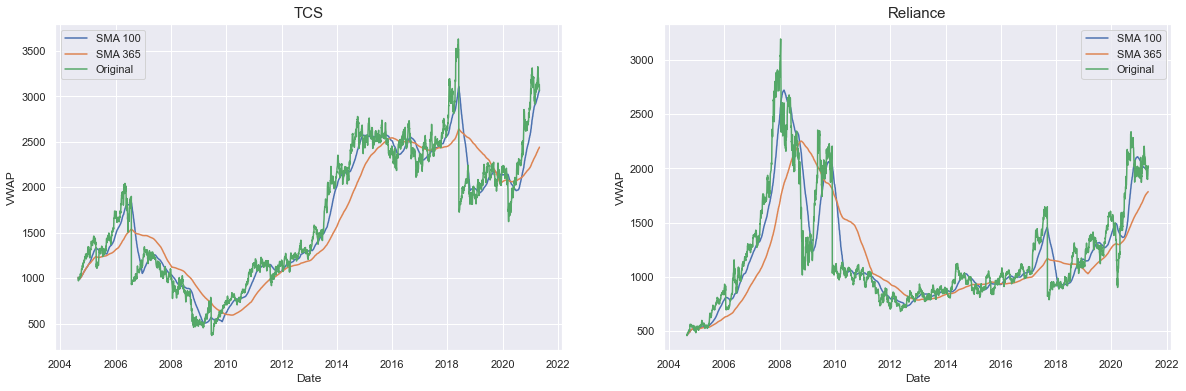

In [31]:
# plotting the simple moving averages for both companies

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(tcs_sma_100, label="SMA 100")
ax1.plot(tcs_sma_365, label="SMA 365")
ax1.plot(tcs['VWAP'], label="Original")
ax1.set_title('TCS', fontsize=15)

ax2.plot(rel_sma_100, label="SMA 100")
ax2.plot(rel_sma_365, label="SMA 365")
ax2.plot(rel['VWAP'], label="Original")
ax2.set_title('Reliance', fontsize=15)

for ax in (ax1, ax2):
    ax.set_ylabel('VWAP')
    ax.set_xlabel('Date')
    ax.legend()

### 5.7 Exponential Moving Average of VWAPs

In [32]:
# calculating the exponential moving averages for both companies, with a smoothing factor of 0.01

tcs_ema_1_100 = tcs['VWAP'].ewm(alpha=0.01, adjust=False).mean()
rel_ema_1_100 = rel['VWAP'].ewm(alpha=0.01, adjust=False).mean()

tcs_ema_1_1000 = tcs['VWAP'].ewm(alpha=0.001, adjust=False).mean()
rel_ema_1_1000 = rel['VWAP'].ewm(alpha=0.001, adjust=False).mean()

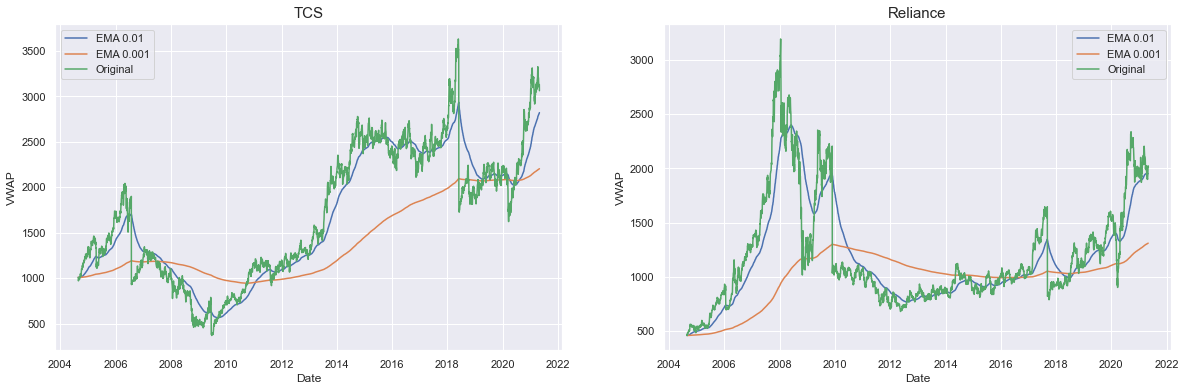

In [33]:
# plotting exponential moving averages for both companies

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(tcs_ema_1_100, label="EMA 0.01")
ax1.plot(tcs_ema_1_1000, label="EMA 0.001")
ax1.plot(tcs['VWAP'], label="Original")
ax1.set_title('TCS', fontsize=15)

ax2.plot(rel_ema_1_100, label="EMA 0.01")
ax2.plot(rel_ema_1_1000, label="EMA 0.001")
ax2.plot(rel['VWAP'], label="Original")
ax2.set_title('Reliance', fontsize=15)

for ax in (ax1, ax2):
    ax.set_ylabel('VWAP')
    ax.set_xlabel('Date')
    ax.legend()

### 5.8 Highest and lowest Volume for each year for both companies

In [34]:
# grouping data by index's year and getting the max and min values from Volume

tcs_max_volume_annual = tcs.groupby(tcs.index.year)['Volume'].max()
rel_max_volume_annual = rel.groupby(rel.index.year)['Volume'].max()

tcs_min_volume_annual = tcs.groupby(tcs.index.year)['Volume'].min()
rel_min_volume_annual = rel.groupby(rel.index.year)['Volume'].min()

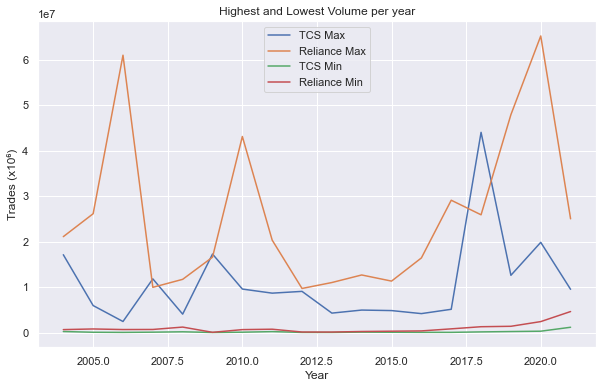

In [35]:
# plotting the highest and lowest volume

plt.figure(figsize=(10, 6))

plt.plot(tcs_max_volume_annual, label = "TCS Max")
plt.plot(rel_max_volume_annual, label = "Reliance Max")
plt.plot(tcs_min_volume_annual, label = "TCS Min")
plt.plot(rel_min_volume_annual, label = "Reliance Min")

plt.xlabel('Year')
plt.ylabel('Trades (x10⁶)')
plt.title('Highest and Lowest Volume per year')
plt.legend()

plt.show()

### 5.9 Open, Close, High and Low prices over time

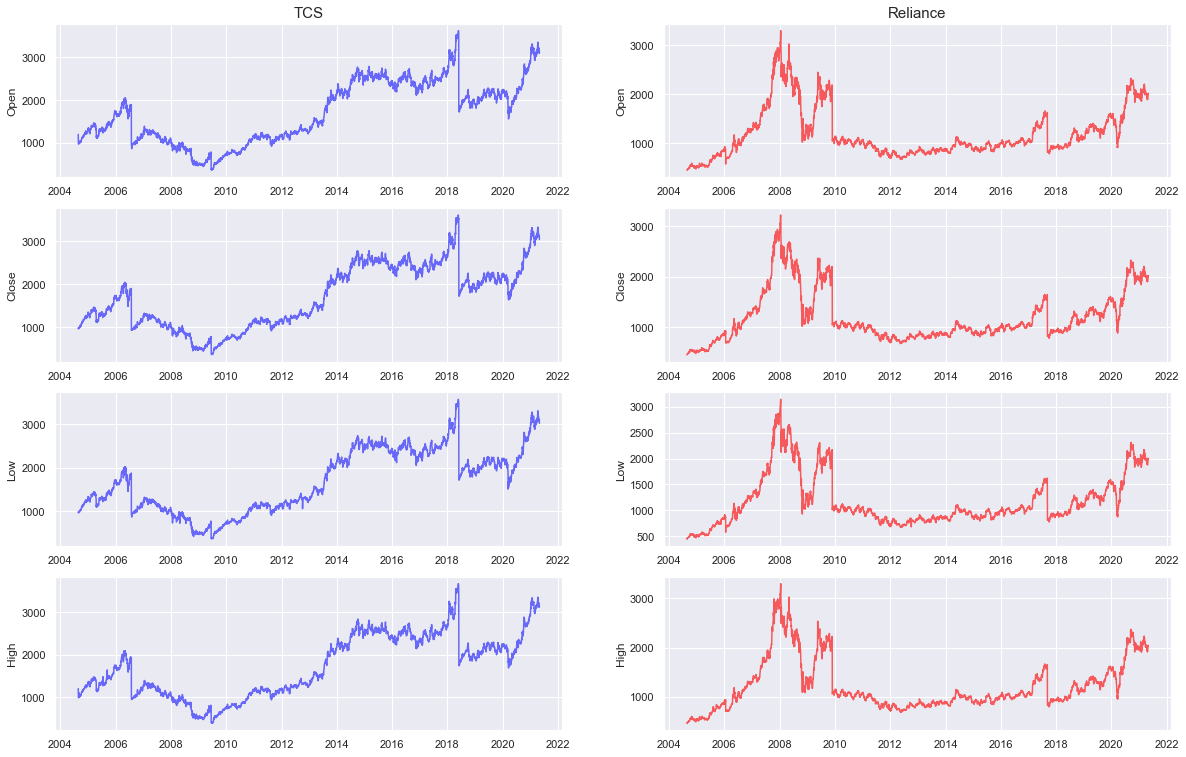

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(20, 13))

cols = ['Open', 'Close', 'Low', 'High']
companies = (tcs, rel)

for x in range(len(companies)):
    for y in range(len(cols)):
        color = '#F6595C'
        if x == 0:
            color = '#6767F8'
        axes[y][x].plot(companies[x][cols[y]], color=color)
        axes[y][x].set_ylabel(cols[y])

axes[0][0].set_title('TCS', fontsize=15)
axes[0][1].set_title('Reliance', fontsize=15)

plt.show()

Attributes like Open, Close, High and Low change in the same manner.

### 5.10 Plot daily returns

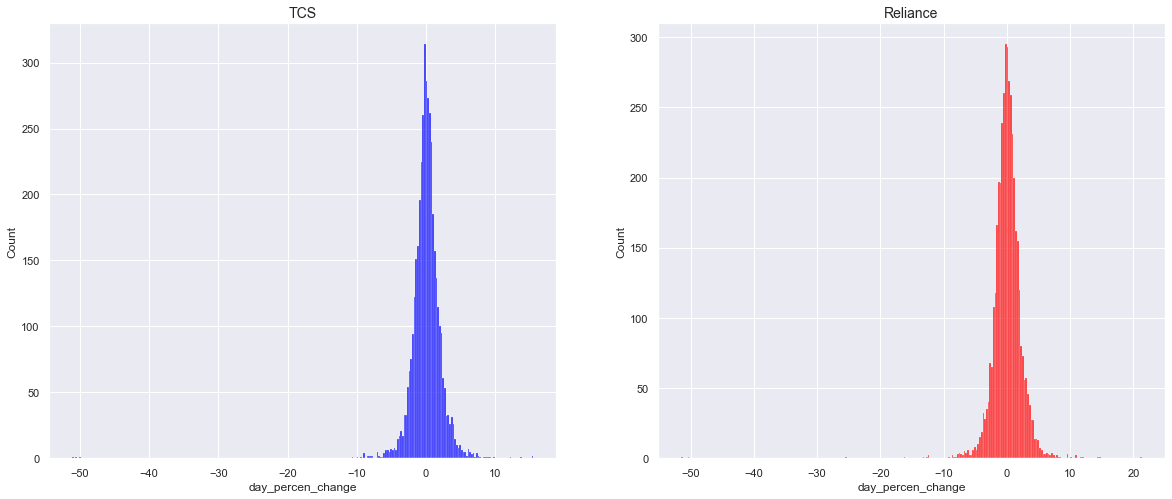

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(tcs['day_percen_change'], ax=ax1, color='blue')
sns.histplot(rel['day_percen_change'], ax=ax2, color='red')

ax1.set_title('TCS', fontsize=14)
ax2.set_title('Reliance', fontsize=14)

plt.show()

### 5.11 Average VWAP per year

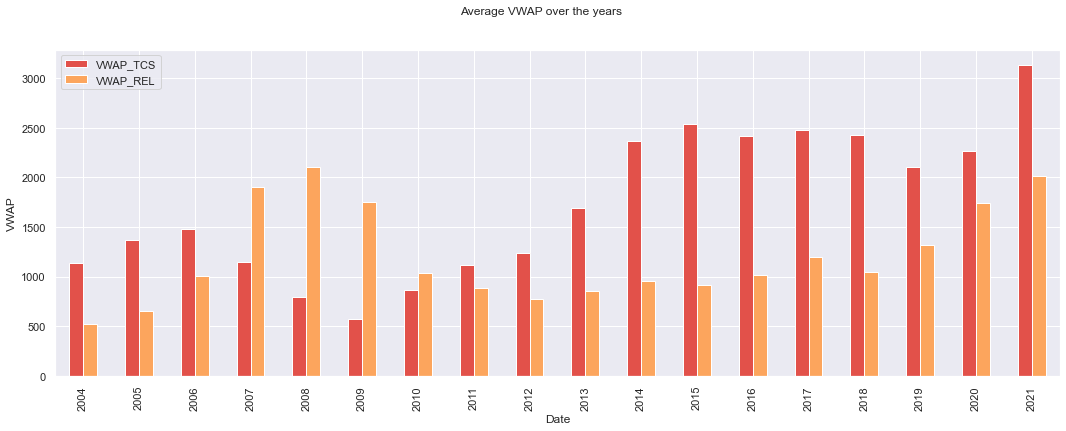

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

merged_vwap = pd.merge(tcs['VWAP'], rel['VWAP'], right_index=True, left_index=True, suffixes=('_TCS', '_REL'))

merged_vwap.resample('Y', kind='period').mean().plot.bar(ax=ax, color=sns.color_palette('Spectral'))

fig.suptitle('Average VWAP over the years')
ax.set_ylabel('VWAP')

plt.show()

Reliance shot past TCS in average VWAPs in 2007, until TCS regained the lead back in 2011 and maintained it for next 10 years. 

### 5.12 Day-wise distribution of trades

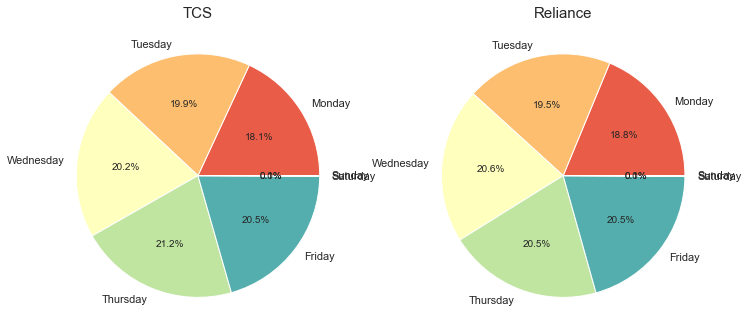

In [39]:
# plotting pie charts to find out the distribution of trades

days_of_week = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for (ax, df) in ((ax1, tcs), (ax2, rel)):
    ax.pie(
        df.groupby(df.index.weekday)['Volume'].sum(), 
        labels=days_of_week, autopct='%1.1f%%',
        colors=sns.color_palette('Spectral', 5)
    )

ax1.set_title('TCS', fontsize=15)
ax2.set_title('Reliance', fontsize=15)

plt.show()

In a week, most shares are traded on Thursdays and Fridays, while least shares are traded on Mondays.

### 5.13 Month-wise distribution of trades

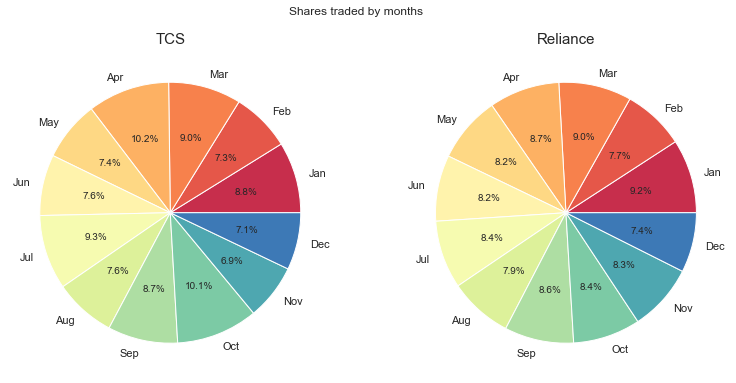

In [40]:
# plotting pie charts to find out month-wise distribution of trades

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

for (ax, df) in ((ax1, tcs), (ax2, rel)):
    ax.pie(
        df.groupby(df.index.month)['Volume'].mean(), 
        labels=month_names, autopct='%1.1f%%', 
        colors=sns.color_palette('Spectral', n_colors=12)
    )

ax1.set_title('TCS', fontsize=15)
ax2.set_title('Reliance', fontsize=15)

fig.suptitle('Shares traded by months')

plt.show()

In a year, most shares are traded during March-April, which mark the end and the beginning of the financial year in India. Festive months like October are also observed to have high trades, possibly due to Muhurat trading.

### 5.14 Visualizing return trends

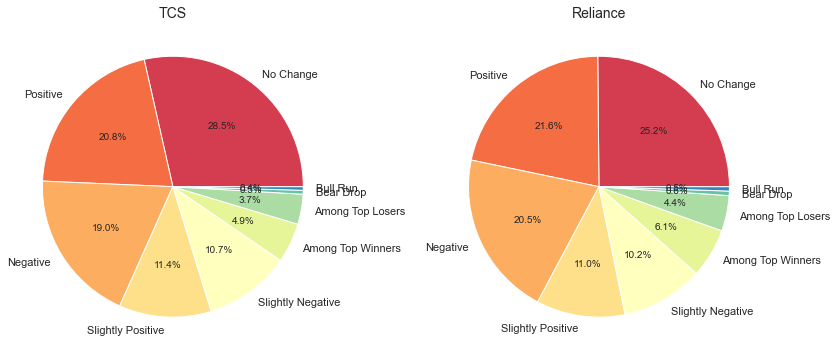

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for df, ax in ((tcs, ax1), (rel, ax2)):
    df['returns_trend'].value_counts().plot.pie(ax=ax, colors=sns.color_palette('Spectral', 9), autopct='%1.1f%%')

for ax, name in ((ax1, 'TCS'), (ax2, 'Reliance')):
    ax.set_title(name, fontsize=14)
    ax.set_ylabel('')

plt.show()

Most of daily returns for the both companies lie in "No Change" category. It is interesting to note that less daily returns tend to be in categories closer to "No Change", like "Slightly Positive" and "Slightly Negative". It suggests that the graph is not exactly smooth at the top.

### 5.15 Most common values for VWAPs

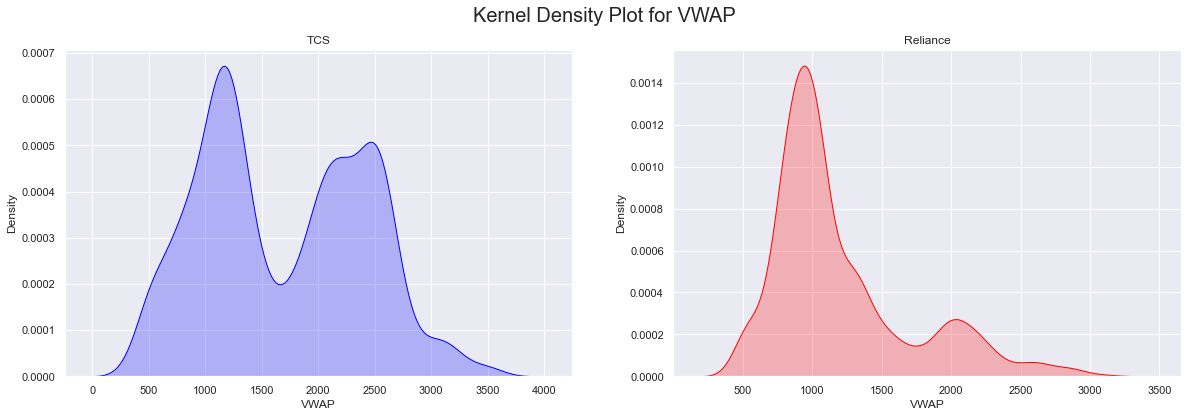

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(tcs['VWAP'], color='blue', shade=True, ax=ax1)
sns.kdeplot(rel['VWAP'], color='red', shade=True, ax=ax2)
ax1.set_title('TCS')

fig.suptitle('Kernel Density Plot for VWAP', fontsize=20)

ax2.set_title('Reliance')

plt.show()

Shares for TCS are mostly valued at around ₹1100, followed by ₹2500 and ₹2150. Shares for Reliance are mostly valued at around ₹1000.

### 5.16 Changes between Close and Open

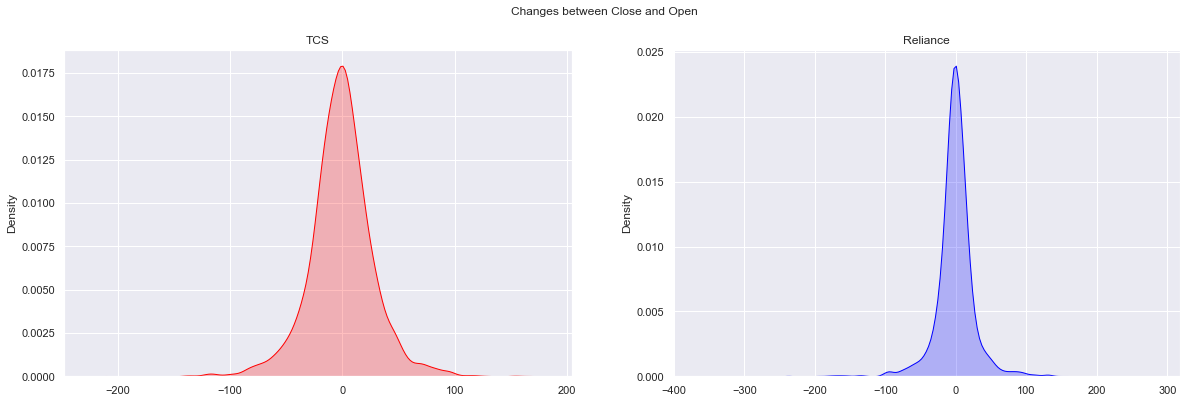

In [43]:
tcs_diff = tcs['Close'] - tcs['Open']
rel_diff = rel['Close'] - rel['Open']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(tcs_diff, shade=True, color='red', ax=ax1)
sns.kdeplot(rel_diff, shade=True, color='blue', ax=ax2)

fig.suptitle('Changes between Close and Open')

ax1.set_title('TCS')
ax2.set_title('Reliance')

plt.show()

The change between Open and Close center around 0 for both companies, which suggests that the prices don't change that drastically in a day. However, Reliance is much more likely to maintain the same price at the end of the day, as it has a narrower curve and a larger value on the y-axis.

### 5.17 Impact of The Great Recession 2008

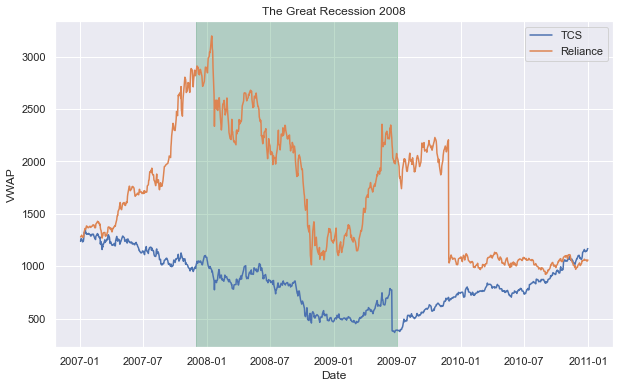

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(tcs.loc['2007':'2010', "VWAP"], label='TCS')
plt.plot(rel.loc['2007':'2010', "VWAP"], label='Reliance')
plt.axvspan('2007-12-01','2009-06-30', color='seagreen', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('The Great Recession 2008')
plt.legend()
plt.show()

A major reason for TCS's fall seems to be The Great Recession of 2008. Reliance was also struck due to the recession but didn't suffer as much as TCS.

### 5.18  Impact of  BJP 2014

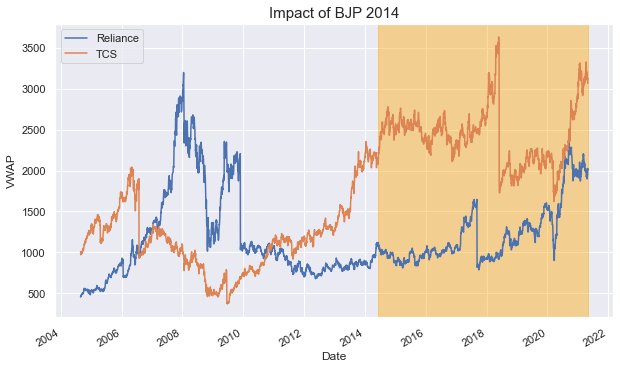

In [45]:
# plotting BJP's govt tenure on the timeline

ax = rel['VWAP'].plot(figsize=(10, 6), label="Reliance")
ax.plot(tcs['VWAP'], label='TCS')
ax.legend()

ax.axvspan('2014-06-01', rel.index[-1], color='orange', alpha=0.4)

ax.set_title('Impact of BJP 2014', fontsize=15)
ax.set_ylabel('VWAP')

plt.show()

### 5.19 Impact of Demonetization

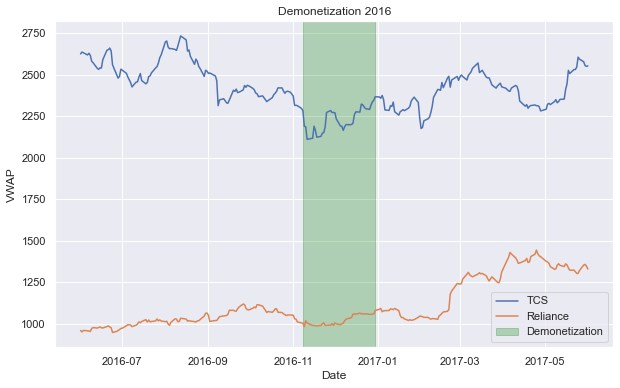

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(tcs.loc['2016-06-01':'2017-06-01', 'VWAP'], label='TCS')
plt.plot(rel.loc['2016-06-01':'2017-06-01', 'VWAP'], label='Reliance')

plt.axvspan('2016-11-08', '2016-12-30', color='green', alpha=0.25, label='Demonetization')

plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('Demonetization 2016')

plt.legend()

plt.show()

While TCS had some setbacks during demonetization, the phenomenon was not able to affect Reliance in the same way.

### 5.20 Impact of COVID-19 lockdown

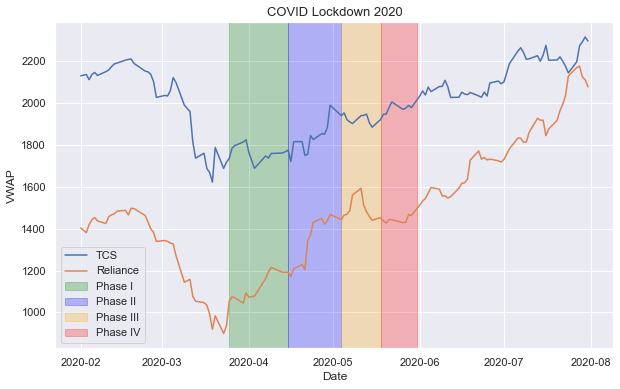

In [47]:
# plotting the VWAP for both companies during COVID phases

phase_dates = [
    ('I', '2020-03-25', '2020-04-15', 'green'), ('II', '2020-04-15', '2020-05-04', 'blue'), 
    ('III', '2020-05-04', '2020-05-18', 'orange'), ('IV', '2020-05-18', '2020-05-31', 'red')
]

plt.figure(figsize=(10, 6))
plt.plot(tcs.loc['2020-02-01':'2020-07-31', 'VWAP'], label="TCS")
plt.plot(rel.loc['2020-02-01':'2020-07-31', 'VWAP'], label="Reliance")

for (idx, start, end, clr) in phase_dates:
    plt.axvspan(start, end, color=clr, alpha=0.25, label='Phase ' + idx)

plt.legend()

plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('COVID Lockdown 2020', fontsize=13)

plt.show()

Even though both companies had some troughs during the lockdowns in 2020, they managed to profit out of the lockdown and increase their share price considerably.

### Conclusion

In order to draw useful insights from the datasets, we dropped unnecessary columns including `Turnover`, `Trades`, `Series` etc. which also solved the issue of handling missing values. We dropped the uncommon rows in both datasets to have same timestamps for the indices.

After preprocessing the datasets, we moved on to analyze the datasets. We calculated basic statistical values like correlation and covariance which helped us to draw the positive relationship between opening prices and VWAP. We also learned that TCS and Reliance are equally likely to experience an increase in price on a day. We also introduced a new column called `day_percen_change` which had the values for daily returns, and further categorized it into another column called `returns_trend`.

Moreover, we plotted the graphs for simple and exponential moving averages of both companies to analyze the market trends. We also learned that attributes like Open, Close, High and Low change in the same manner. Looking at average VWAP per year, we learned that Reliance shot past TCS in average VWAPs in 2007, until TCS regained the lead back in 2011 and maintained it for next 10 years.

Some of the points we analyzed from the plots are as follows:

* In a week, most shares are traded on Thursdays and Fridays, while least shares are traded on Mondays and in a year, most shares are traded during March-April, which mark the end and the beginning of the financial year in India. 

* Festive months like October are also observed to have high trades, possibly due to Muhurat trading.

* Most of daily returns for the both companies lie in "No Change" category. It is interesting to note that less daily returns tend to be in categories closer to "No Change", like "Slightly Positive" and "Slightly Negative". It suggests that the graph is not exactly smooth at the top.

* Shares for TCS are mostly valued at around ₹1100, followed by ₹2500 and ₹2150. Shares for Reliance are mostly valued at around ₹1000.

* A major reason for TCS's fall seems to be The Great Recession of 2008. Reliance was also struck due to the recession but didn't suffer as much as TCS.

* Even though both companies had some troughs during the lockdowns in 2020, they managed to profit out of the lockdown and increase their share price considerably.